In [66]:
import pandas as pd
import rustworkx as rx
import numpy as np
from rustworkx.visualization import mpl_draw as draw
from qiskit.quantum_info import SparsePauliOp

df = pd.read_csv("mat_adj.csv")
df = df[['0','1','2', '3','4','5']]
df = df.iloc[['0','1','2', '3','4','5']]  # type: ignore
print(df)
mat_adj = np.array(df)

            

          0         1         2         3         4         5
0  0.000000  0.036235  0.000000  0.139466  0.024777  0.000000
1  0.036235  0.000000  0.067630  0.000764  0.276057  0.000000
2  0.000000  0.067630  0.000000  0.000000  0.000000  0.246496
3  0.139466  0.000764  0.000000  0.000000  0.002812  0.000000
4  0.024777  0.276057  0.000000  0.002812  0.000000  0.003102
5  0.000000  0.000000  0.246496  0.000000  0.003102  0.000000


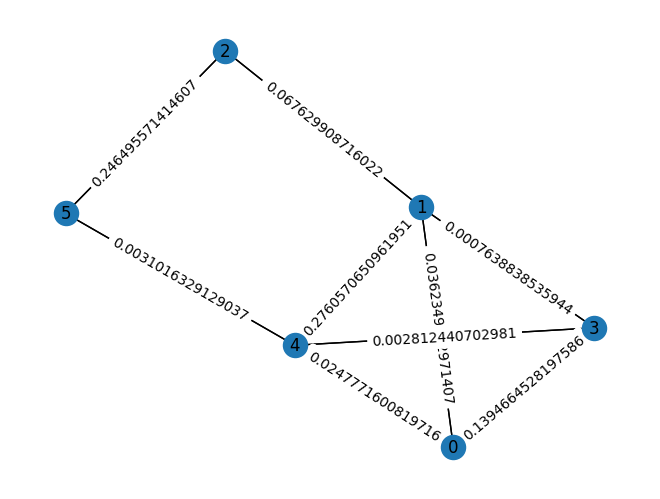

In [68]:
# With the adjacency matrix, we can build a graph : 
graph_cross = rx.PyGraph()
num_nodes_cross_graph = 6 
nodes_list = graph_cross.add_nodes_from((range(num_nodes_cross_graph)))
# Add edges : 
edges = []
for i in range(num_nodes_cross_graph):
    for j in range(num_nodes_cross_graph):
        if mat_adj[i, j] != 0:
            edges.append((i, j, mat_adj[i, j]))
            
# print(edges)
graph_cross.add_edges_from(edges)
draw(graph_cross, with_labels=True, edge_labels=str) # type: ignore

In [73]:
wq0 = mat_adj[0,1]
wq1 = mat_adj[0,3]
wq2 = mat_adj[0,4]
wq3 = mat_adj[1,2]
wq4 = mat_adj[1,3]
wq5 = mat_adj[1,4]
wq6 = mat_adj[2,5]
wq7 = mat_adj[3,4]
wq8 = mat_adj[4,5]

all_weights_sum  = sum(np.tril(mat_adj).flatten())

h_c = SparsePauliOp.from_list([("IIIIIIIII",all_weights_sum/2),
                               ("IIIIIIIIZ", -wq0 /2),
                               ("IIIIIIIZI", -wq1 /2),
                               ("IIIIIIZII", -wq2 /2),
                               ("IIIIIZIII", -wq3 /2),
                               ("IIIIZIIII", -wq4 /2),
                               ("IIIZIIIII", -wq5 /2),
                               ("IIZIIIIII", -wq6 /2),
                               ("IZIIIIIII", -wq7 /2),
                               ("ZIIIIIIII", -wq8 /2)])
